In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
from factor_analyzer import FactorAnalyzer

读入数据

In [7]:
datafile = u'D:\俞梦熠\ipsos\week6\VIVO智能手表\项目data.csv'
data = pd.read_csv(datafile)
data.head()

FileNotFoundError: [Errno 2] File D:\俞梦熠\ipsos\week6\VIVO智能手表\项目data.csv does not exist: 'D:\\俞梦熠\\ipsos\\week6\\VIVO智能手表\\项目data.csv'

In [6]:
data.shape

NameError: name 'data' is not defined

有1949条记录，每条记录有72个变量

## 因子分析

通过factoranalyzer函数进行因子分析

In [4]:
fa = FactorAnalyzer()
fa.analyze(data, 5, rotation=None)
#固定公共因子个数为5个

输出公因子方差矩阵

In [5]:
print("公因子方差:\n", fa.get_communalities())#公因子方差
np.savetxt('5公因子方差.csv', fa.get_communalities(), delimiter = ',') 
fa.get_communalities().shape

公因子方差:
         Communalities
D1__1        0.295045
D1__2        0.389011
D1__5        0.412408
D1__6        0.101311
D1__7        0.209208
...               ...
A1__16       0.211007
A1__17       0.272406
A1__18       0.268875
A1__19       0.250336
A1__98       0.016056

[72 rows x 1 columns]


(72, 1)

输出成分矩阵

In [6]:
print("\n成分矩阵:\n", fa.loadings)#成分矩阵
np.savetxt('5成分矩阵.csv', fa.loadings, delimiter = ',') 
fa.loadings.shape


成分矩阵:
          Factor1   Factor2   Factor3   Factor4
D1__1   0.541412  0.004533 -0.043550  0.000995
D1__2   0.457460  0.031381 -0.216181  0.363348
D1__5   0.447889  0.086644 -0.198021  0.406305
D1__6   0.306439 -0.000385 -0.085822  0.006361
D1__7   0.428472 -0.056759 -0.149091  0.013050
...          ...       ...       ...       ...
A1__16  0.119512 -0.167775  0.308040  0.271453
A1__17  0.179749 -0.087626  0.380326  0.296261
A1__18  0.127315 -0.031138  0.455495  0.210288
A1__19  0.169755 -0.089126  0.358544  0.291584
A1__98 -0.075467 -0.013106 -0.061635 -0.079935

[72 rows x 4 columns]


(72, 4)

输出贡献率矩阵

In [7]:
var = fa.get_factor_variance()#给出贡献率
print("\n解释的总方差（即贡献率）:\n", var)
np.savetxt('5贡献率.csv', var, delimiter = ',') 
fa.get_factor_variance().shape


解释的总方差（即贡献率）:
                   Factor1   Factor2   Factor3   Factor4
SS Loadings     10.126687  3.423466  2.781538  2.314913
Proportion Var   0.140648  0.047548  0.038632  0.032152
Cumulative Var   0.140648  0.188197  0.226829  0.258981


(3, 4)

计算因子得分

In [8]:
fa_score = fa.get_scores(data)#因子得分
fa_score.head()
np.savetxt('5因子得分.csv', fa_score, delimiter = ',')  
fa_score.shape

(1949, 4)

In [9]:
#将各因子乘上他们的贡献率除以总的贡献率,得到因子得分中间值
a = (fa.get_scores(data)*var.values[1])/var.values[-1][-1]

In [10]:
#将各因子得分中间值相加，得到综合得分
a['score'] = a.apply(lambda x: x.sum(), axis=1)
a.head()

,Factor1,Factor2,Factor3,Factor4,score
0,0.065898,-0.055002,0.150776,-0.077411,0.084260
1,0.543320,0.023700,-0.078436,-0.192924,0.295660
2,0.362661,-0.132034,0.016170,0.004970,0.251767
3,-0.786881,0.094171,-0.059662,-0.025743,-0.778115
4,0.564545,0.329842,-0.045749,-0.150758,0.697880


# 聚类

## 导入需要的包

In [2]:
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.cluster import KMeans
from sklearn.cluster import Birch

## 设置文件导入导出的位置

In [3]:
datafile = u'C:\\Users\\Administrator\\Desktop\\聚类\\5因子得分.csv'#文件所在位置，u为防止路径中有中文名称，此处没有，可以省略
outfile = u'C:\\Users\\Administrator\\Desktop\\聚类\\5julei_out.csv'#设置输出文件的位置
data = pd.read_csv(datafile)#datafile是excel文件，所以用read_excel,如果是csv文件则用read_csv
d = DataFrame(data)

## 进行样本分类

In [4]:
mod = KMeans(n_clusters=6, n_jobs = 6, max_iter = 500)#聚成6类数据,并发数为6，最大循环次数为500
mod.fit_predict(d)#y_pred表示聚类的结果
#聚成6类数据，统计每个聚类下的数据量，并且求出他们的中心
r1 = pd.Series(mod.labels_).value_counts()
r2 = pd.DataFrame(mod.cluster_centers_)
r = pd.concat([r2, r1], axis = 1)
r.columns = list(d.columns) + [u'类别数目']
#给每一条数据标注上被分为哪一类
r = pd.concat([d, pd.Series(mod.labels_, index = d.index)], axis = 1)
r.columns = list(d.columns) + [u'聚类类别']
print(r.head())
r.to_csv(outfile,sep=',',encoding='utf_8_sig',index=False, header=True)

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


   factor1  factor2  factor3  factor4  factor5  聚类类别
0    0.119   -0.285    1.015   -0.629    0.578     2
1    1.005    0.126   -0.514   -1.558   -0.296     3
2    0.669   -0.742    0.137    0.054   -0.147     0
3   -1.449    0.515   -0.404   -0.203   -0.495     4
4    1.041    1.795   -0.309   -1.197   -0.424     3


## 可视化部分

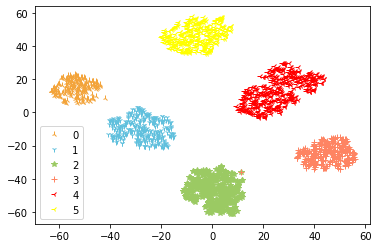

In [7]:
from sklearn.manifold import TSNE
ts = TSNE()
ts.fit_transform(r)
ts = pd.DataFrame(ts.embedding_, index = r.index)
import matplotlib.pyplot as plt 
a = ts[r[u'聚类类别'] == 0]
plt.plot(a[0], a[1], '2',color='#f3a43b',label="0")
a = ts[r[u'聚类类别'] == 1]
plt.plot(a[0], a[1], '1',color='#60c0dd', label="1")
a = ts[r[u'聚类类别'] == 2]
plt.plot(a[0], a[1], '*',color='#9bca63', label="2")
a = ts[r[u'聚类类别'] == 3]
plt.plot(a[0], a[1], '+',color='#fe8463', label="3")
a = ts[r[u'聚类类别'] == 4]
plt.plot(a[0], a[1], '3',color='red', label="4")
a = ts[r[u'聚类类别'] == 5]
plt.plot(a[0], a[1], '3',color='yellow', label="5")
plt.legend(); #加图例
plt.show()

In [6]:
print(mod.cluster_centers_)
np.savetxt('雷达图.csv', mod.cluster_centers_, delimiter = ',') 

[[ 0.40648943 -0.67855589 -0.45824471  0.46587915  0.63848036]
 [-0.10579772 -0.26904558 -0.39441595  0.49382621 -0.97636182]
 [-0.09507547 -0.9241283   0.40800377 -1.2012      0.08913962]
 [ 0.57695759  0.82621205 -0.38596429 -0.3650067   0.04009152]
 [-1.37625074  0.40379646  0.0500708   0.03653097  0.23840118]
 [ 0.63183721  0.26469767  1.57171628  0.66007442  0.04168372]]
